In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium

In [2]:

# Load your dataset
df = pd.read_csv('../Data Cleaning/Road_Crash_Data.csv')

# Drop the location column
df.drop(columns=['report_id'], inplace=True)


/var/folders/p3/r3tlf0sj4rsfpv7j1hvsz4vr0000gn/T/ipykernel_65957/2731845082.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data Cleaning/Road_Crash_Data.csv')


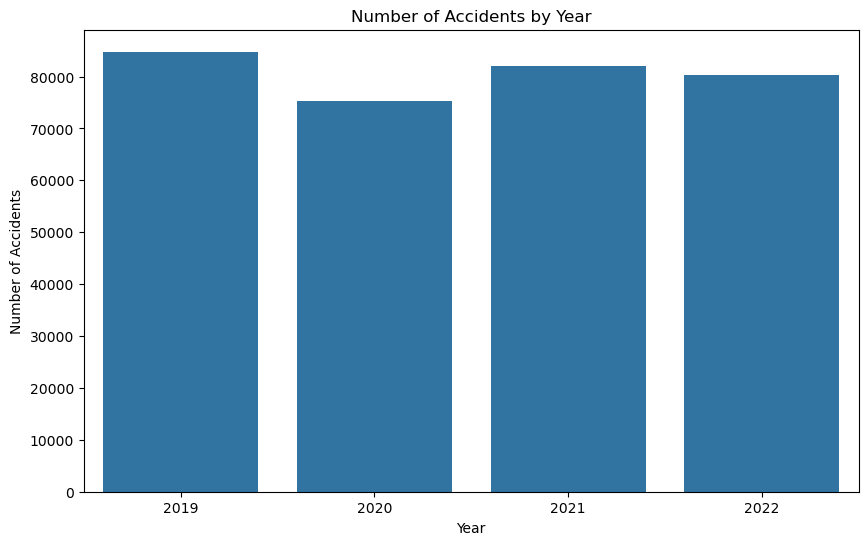

In [3]:

# Assuming the DataFrame 'df' has been loaded and cleaned as described before

# Visualization of the number of accidents by year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


Converting the month Column Using Label Encoding
Why We Are Converting the month Column
The month column in the dataset is a categorical variable that represents the months of the year. To effectively use this column in machine learning models, we need to convert it from its original string format to a numerical format. This conversion is important because most machine learning algorithms require numerical inputs and cannot process categorical data directly.

From: Original Categorical Format
The original month column is in a categorical format with string values such as "January", "February", "March", etc. These string values represent the months but do not provide a meaningful numerical representation for analysis or modeling.

To: Label Encoded Numerical Format
By using Label Encoding, we convert the month column to a numerical format where each month is assigned a unique integer value. This method preserves the ordinal nature of the months, maintaining their inherent order (i.e., January is the first month, February is the second month, etc.).

Label Encoding Steps
Here is the Python code to convert the month column using Label Encoding, starting with January as 1 and ending with December as 12:

In [4]:

# Manually create a mapping for months
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Map the month column to numerical values
df['month'] = df['month'].map(month_mapping)



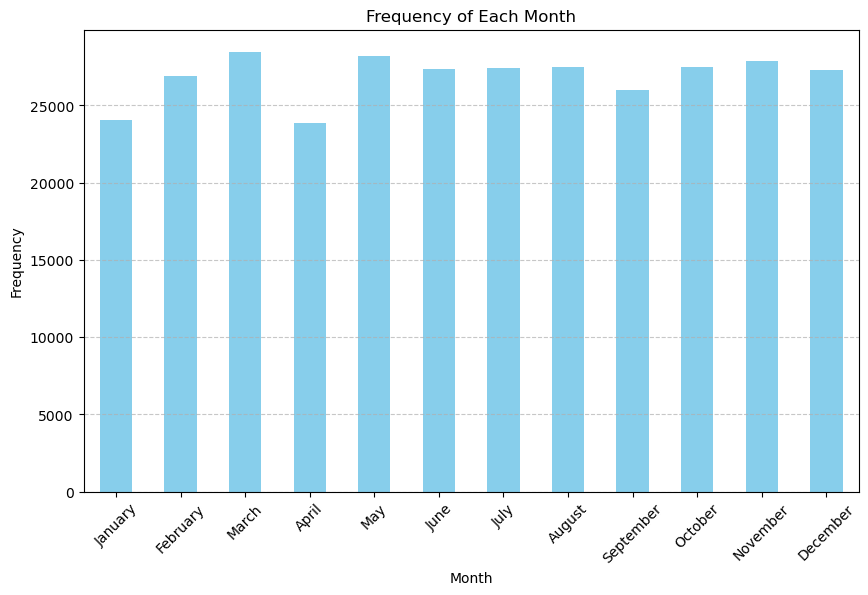

In [5]:
# Plot to visualize the frequency of each month
plt.figure(figsize=(10, 6))
df['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Converting the day Column Using Label Encoding
Why We Are Converting the day Column
The day column in the dataset is a categorical variable that represents the days of the week. To effectively use this column in machine learning models, we need to convert it from its original string format to a numerical format. This conversion is important because most machine learning algorithms require numerical inputs and cannot process categorical data directly.

From: Original Categorical Format
The original day column is in a categorical format with string values such as "Monday", "Tuesday", "Wednesday", etc. These string values represent the days of the week but do not provide a meaningful numerical representation for analysis or modeling.

To: Label Encoded Numerical Format
By using Label Encoding, we convert the day column to a numerical format where each day is assigned a unique integer value. This method preserves the ordinal nature of the days, maintaining their inherent order (i.e., Monday is the first day, Tuesday is the second day, etc.).

Label Encoding Steps
Here is the Python code to convert the day column using Label Encoding, starting with Monday as 1 and ending with Sunday as 7:

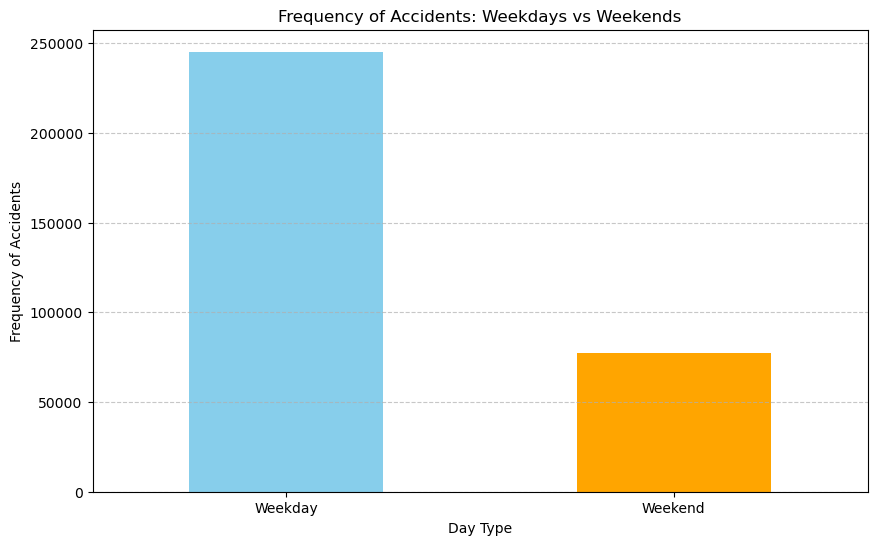

In [6]:
# Manually create a mapping for days
day_mapping = {
    'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday',
    'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'
}

# Map the day column to 'Weekday' or 'Weekend'
df['day_type'] = df['day'].map(day_mapping)

# Add one-hot encoded columns for 'Weekday' and 'Weekend'
df['Weekday'] = df['day_type'].apply(lambda x: 1 if x == 'Weekday' else 0)
df['Weekend'] = df['day_type'].apply(lambda x: 1 if x == 'Weekend' else 0)

# Counting occurrences of each day type
day_type_counts = df[['Weekday', 'Weekend']].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
day_type_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Frequency of Accidents: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Frequency of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322382 entries, 0 to 322381
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           322382 non-null  int64  
 1   month          322382 non-null  int64  
 2   day            322382 non-null  object 
 3   time           322382 non-null  object 
 4   state          322382 non-null  object 
 5   stats_area     322382 non-null  object 
 6   lga            322382 non-null  object 
 7   latitude       322382 non-null  float64
 8   longitude      322382 non-null  float64
 9   loc_type       322382 non-null  object 
 10  light_cond     322382 non-null  object 
 11  weather_cond   322382 non-null  object 
 12  speed_limit    322382 non-null  float64
 13  csef_severity  322382 non-null  object 
 14  location       322382 non-null  object 
 15  day_type       322382 non-null  object 
 16  Weekday        322382 non-null  int64  
 17  Weekend        322382 non-nul

Converting Time to One-Hour Intervals
Purpose
When dealing with time data in various analyses, it's often useful to aggregate or categorize the time into larger intervals. One common approach is to convert time into one-hour intervals. This method provides several benefits:

Simplification: Raw time data (like 'HH
') can be complex to analyze due to the large number of possible values. Grouping them into one-hour intervals simplifies the dataset.
Pattern Recognition: It becomes easier to identify patterns and trends over different parts of the day. For example, you might want to analyze traffic patterns, customer footfall, or server load, which often vary significantly by hour.
Data Aggregation: Aggregating data into hourly intervals allows for more meaningful statistical analysis. Summarizing or averaging data within these intervals can provide insights that are lost in minute-level granularity.
Visualization: Visual representations (like bar charts) become clearer and more interpretable when data is grouped into hourly intervals.

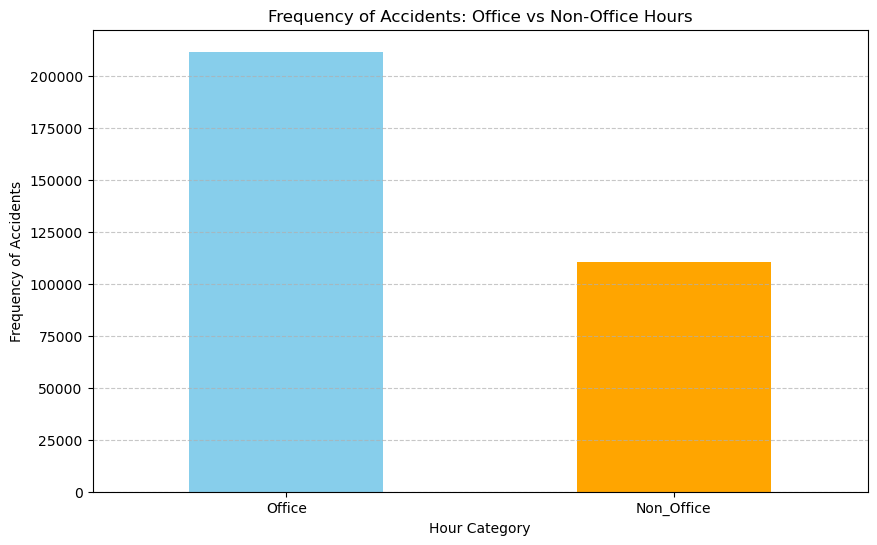

In [8]:
# Assuming df is your DataFrame and the 'time' column contains time in 'HH:MM' format
# Convert data types
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

# Ensure all entries in the 'time' column are strings and strip whitespace
df['time'] = df['time'].astype(str).str.strip()

# Function to extract hours as integers
def convert_time_to_hour(time_str):
    if time_str in [None, '', 'nan']:
        return None
    try:
        parts = time_str.split(':')
        hours = int(parts[0])
        return hours
    except:
        return None

# Apply the function to convert time to integer hour
df['hour'] = df['time'].apply(convert_time_to_hour)

# Drop rows where time conversion failed
df = df.dropna(subset=['hour'])

# Add one-hot encoded columns for 'Office' and 'Non-Office' hours
df['Office'] = df['hour'].apply(lambda x: 1 if 9 <= x <= 18 else 0)
df['Non_Office'] = df['hour'].apply(lambda x: 1 if x < 9 or x > 18 else 0)

# Counting occurrences of each category
category_counts = df[['Office', 'Non_Office']].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Frequency of Accidents: Office vs Non-Office Hours')
plt.xlabel('Hour Category')
plt.ylabel('Frequency of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322382 entries, 0 to 322381
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           322382 non-null  int64  
 1   month          322382 non-null  int64  
 2   day            322382 non-null  object 
 3   time           322382 non-null  object 
 4   state          322382 non-null  object 
 5   stats_area     322382 non-null  object 
 6   lga            322382 non-null  object 
 7   latitude       322382 non-null  float64
 8   longitude      322382 non-null  float64
 9   loc_type       322382 non-null  object 
 10  light_cond     322382 non-null  object 
 11  weather_cond   322382 non-null  object 
 12  speed_limit    322382 non-null  float64
 13  csef_severity  322382 non-null  object 
 14  location       322382 non-null  object 
 15  day_type       322382 non-null  object 
 16  Weekday        322382 non-null  int64  
 17  Weekend        322382 non-nul

In [10]:
# Apply One-Hot Encoding to the specified columns
df = pd.get_dummies(df, columns=['loc_type', 'light_cond', 'weather_cond'], prefix=['loc_type', 'light_cond', 'weather_cond'])


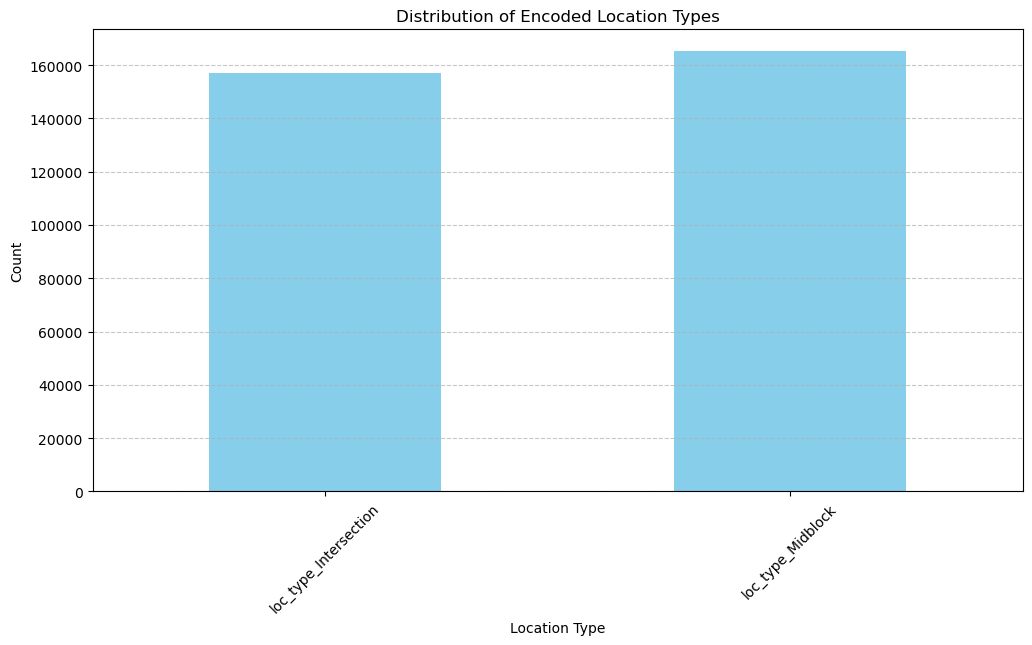

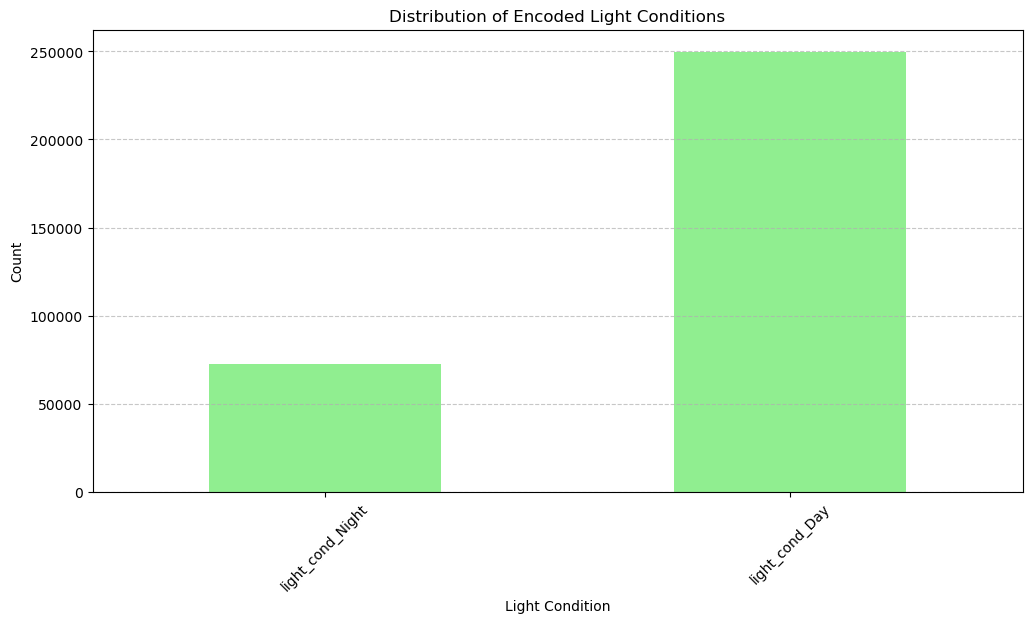

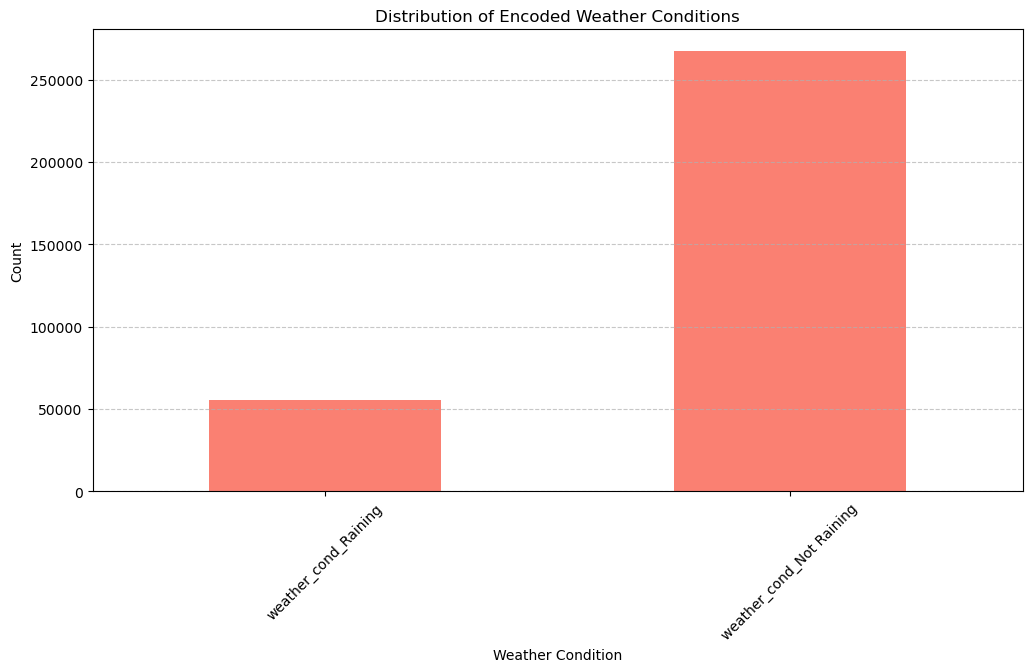

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of encoded columns for each original categorical feature
encoded_columns_loc_type = [col for col in df.columns if col.startswith('loc_type_')]
encoded_columns_light_cond = [col for col in df.columns if col.startswith('light_cond_')]
encoded_columns_weather_cond = [col for col in df.columns if col.startswith('weather_cond_')]

# Plotting distribution for loc_type encoded features
plt.figure(figsize=(12, 6))
df[encoded_columns_loc_type].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title('Distribution of Encoded Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting distribution for light_cond encoded features
plt.figure(figsize=(12, 6))
df[encoded_columns_light_cond].sum().sort_values().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Encoded Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting distribution for weather_cond encoded features
plt.figure(figsize=(12, 6))
df[encoded_columns_weather_cond].sum().sort_values().plot(kind='bar', color='salmon')
plt.title('Distribution of Encoded Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
# Values to combine
values_to_combine = [40.0, 30.0, 25.0, 10.0, 20.0, 15.0, 5.0]

# Combine specified values into one (e.g., 40.0)
df['speed_limit'] = df['speed_limit'].replace(values_to_combine, 40.0)

df['speed_limit'] = df['speed_limit'].replace(75.0, 70.0)

df['speed_limit'] = df['speed_limit'].astype(int)


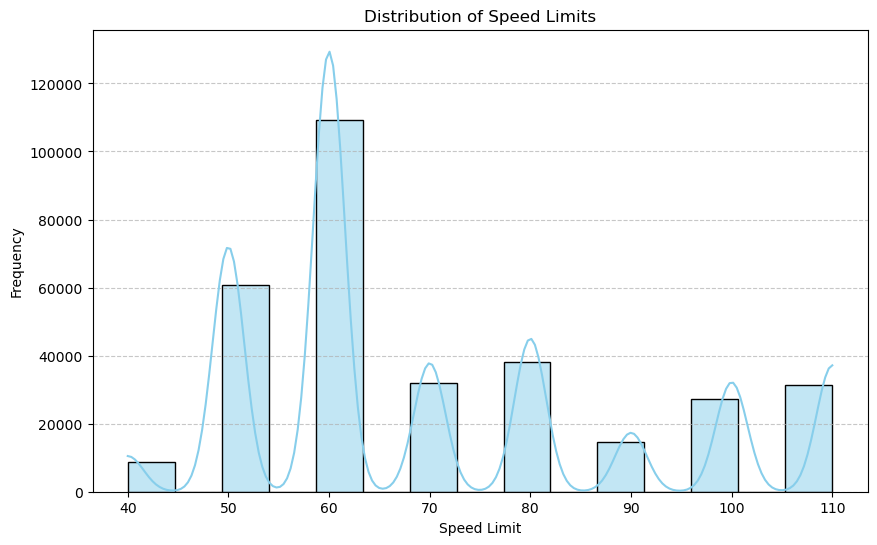

In [13]:
# Plotting the distribution of speed limits using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['speed_limit'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Create new columns for less than or equal to 60 and greater than 60
df['less_than_or_equal_60'] = df['speed_limit'].apply(lambda x: 1 if x <= 60 else 0)
df['greater_than_60'] = df['speed_limit'].apply(lambda x: 1 if x > 60 else 0)

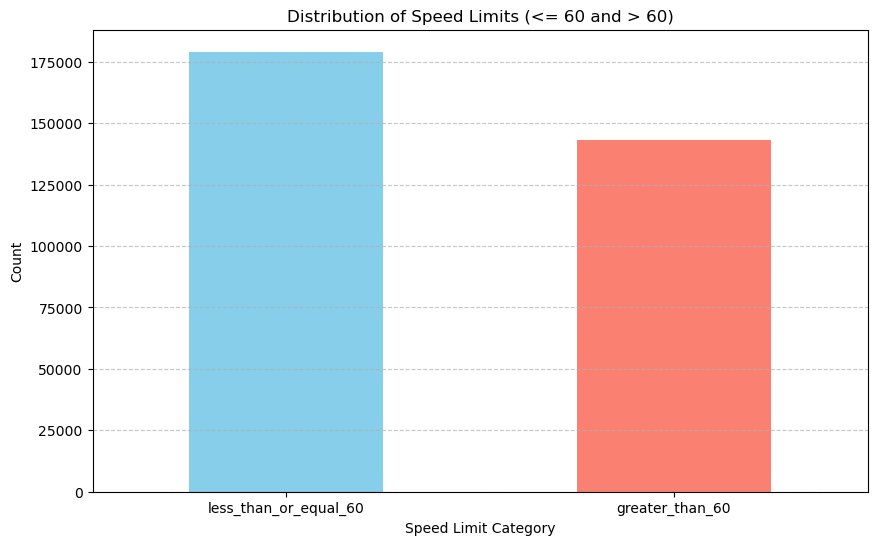

In [15]:


# Plotting the distribution of less_than_or_equal_60 and greater_than_60
plt.figure(figsize=(10, 6))
df[['less_than_or_equal_60', 'greater_than_60']].sum().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Speed Limits (<= 60 and > 60)')
plt.xlabel('Speed Limit Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


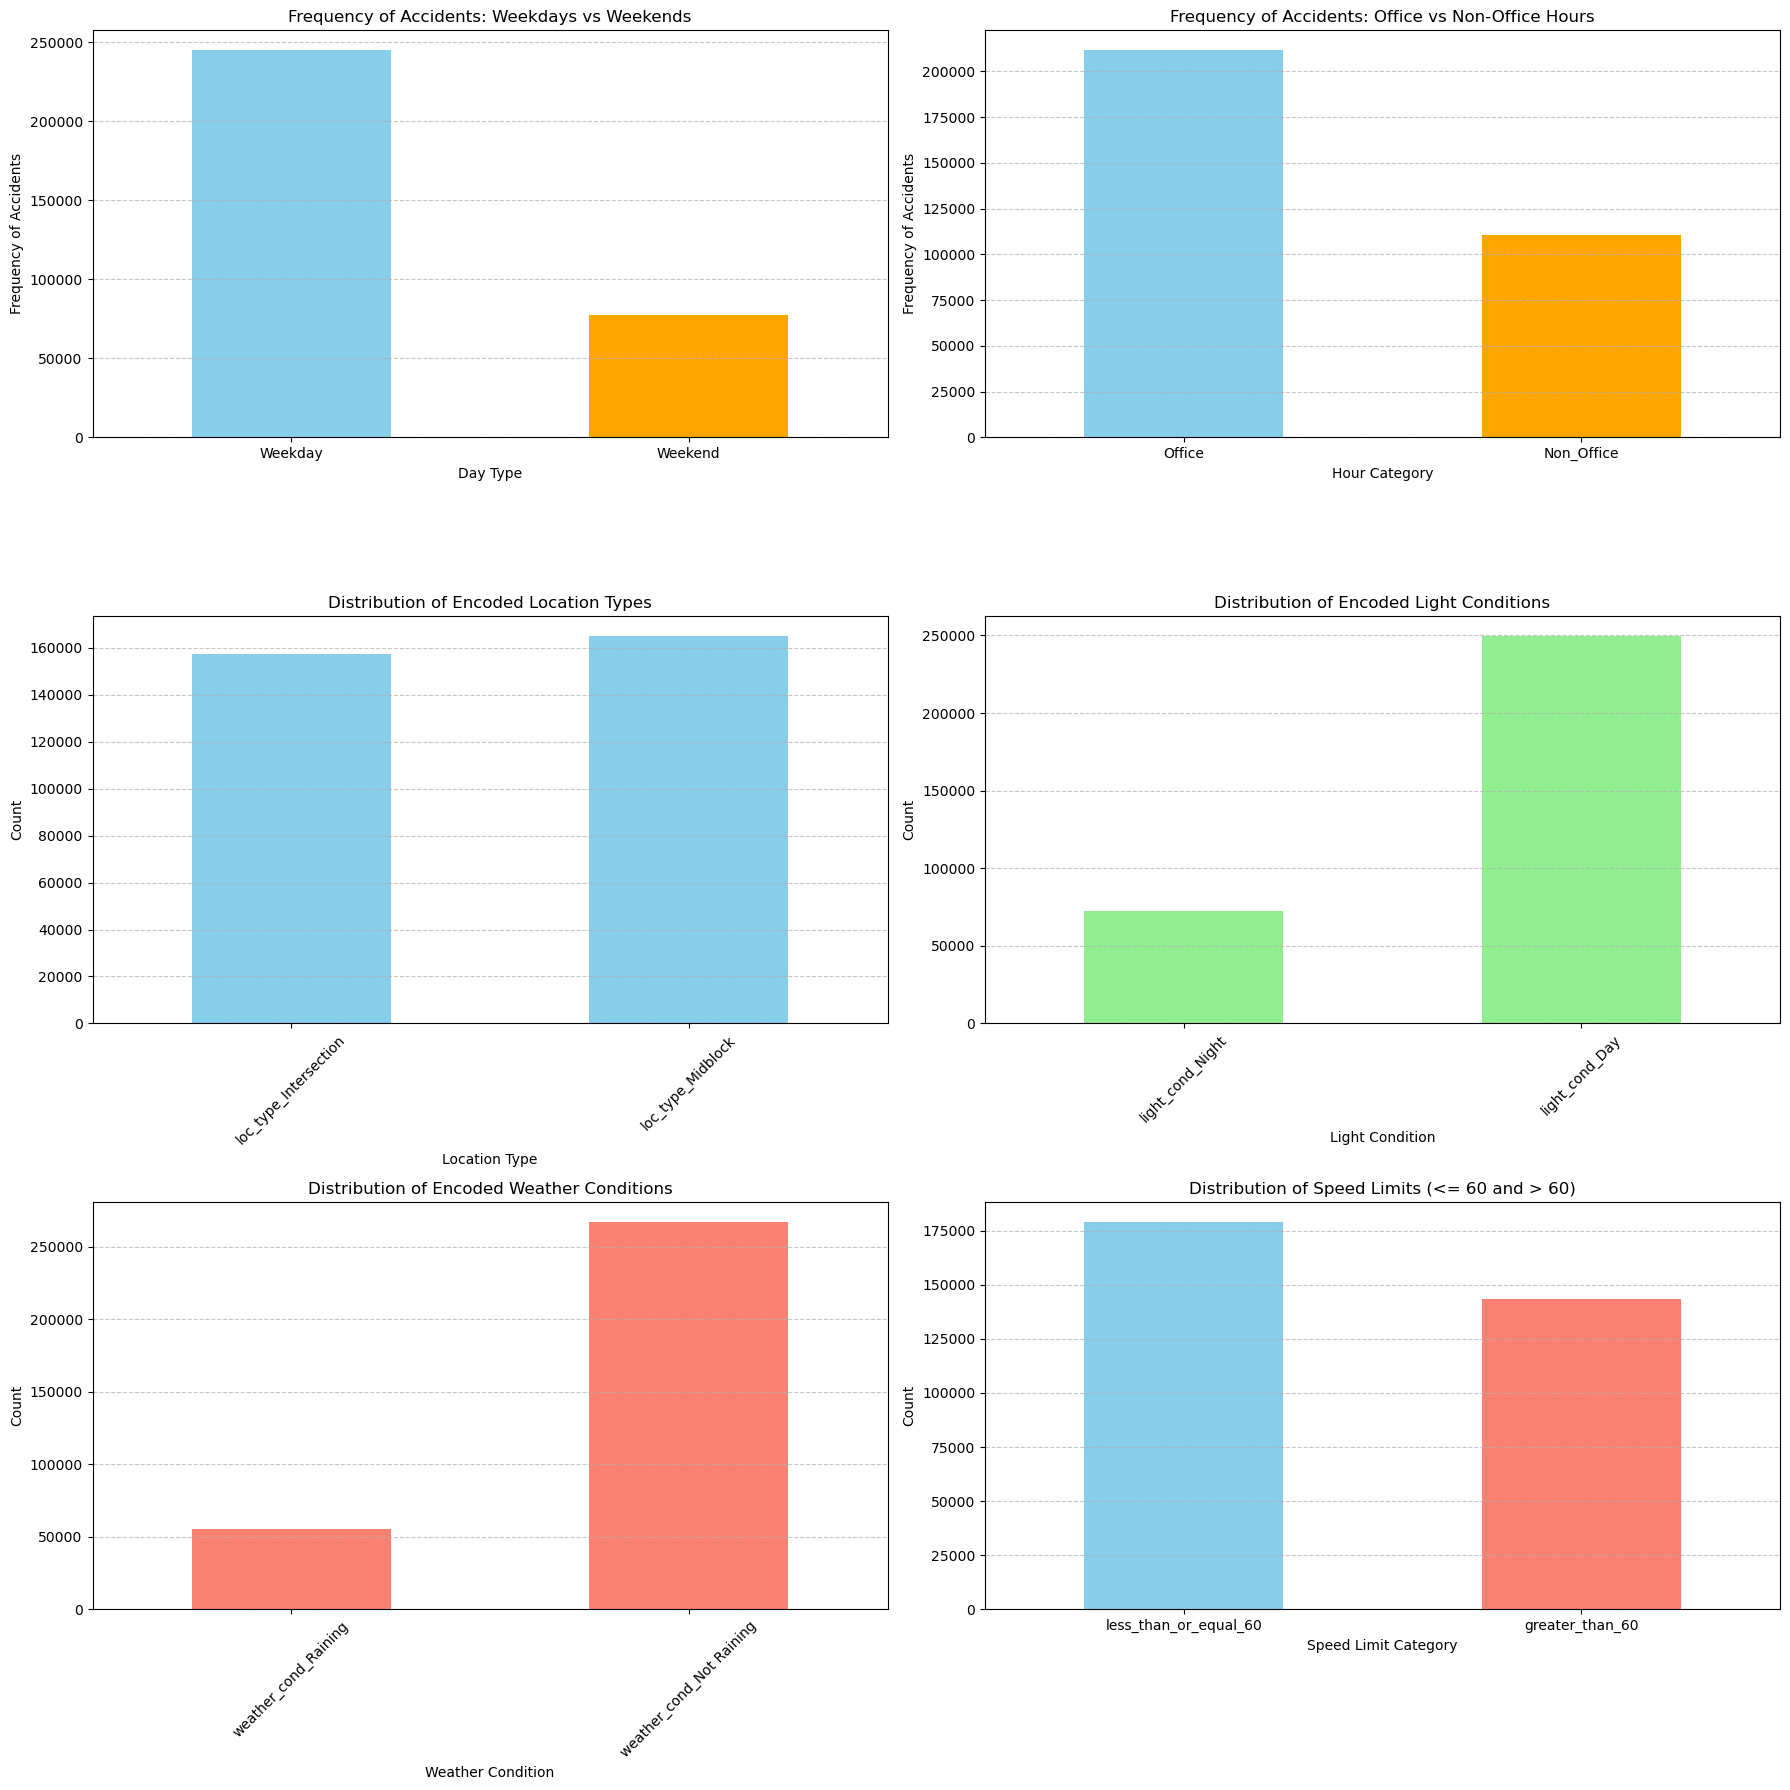

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plotting the bar chart for day type counts
day_type_counts.plot(kind='bar', color=['skyblue', 'orange'], ax=axes[0, 0])
axes[0, 0].set_title('Frequency of Accidents: Weekdays vs Weekends')
axes[0, 0].set_xlabel('Day Type')
axes[0, 0].set_ylabel('Frequency of Accidents')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the bar chart for hour category counts
category_counts.plot(kind='bar', color=['skyblue', 'orange'], ax=axes[0, 1])
axes[0, 1].set_title('Frequency of Accidents: Office vs Non-Office Hours')
axes[0, 1].set_xlabel('Hour Category')
axes[0, 1].set_ylabel('Frequency of Accidents')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution for loc_type encoded features
df[encoded_columns_loc_type].sum().sort_values().plot(kind='bar', color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Encoded Location Types')
axes[1, 0].set_xlabel('Location Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution for light_cond encoded features
df[encoded_columns_light_cond].sum().sort_values().plot(kind='bar', color='lightgreen', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Encoded Light Conditions')
axes[1, 1].set_xlabel('Light Condition')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution for weather_cond encoded features
df[encoded_columns_weather_cond].sum().sort_values().plot(kind='bar', color='salmon', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Encoded Weather Conditions')
axes[2, 0].set_xlabel('Weather Condition')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)
axes[2, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the distribution of less_than_or_equal_60 and greater_than_60
df[['less_than_or_equal_60', 'greater_than_60']].sum().plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Speed Limits (<= 60 and > 60)')
axes[2, 1].set_xlabel('Speed Limit Category')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=0)
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [17]:
# Extract numerical part from csef_severity and convert to int
df['csef_severity'] = df['csef_severity'].str.extract(r'(\d+)').astype(int)



/var/folders/p3/r3tlf0sj4rsfpv7j1hvsz4vr0000gn/T/ipykernel_65957/2975858411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='csef_severity', palette='viridis')


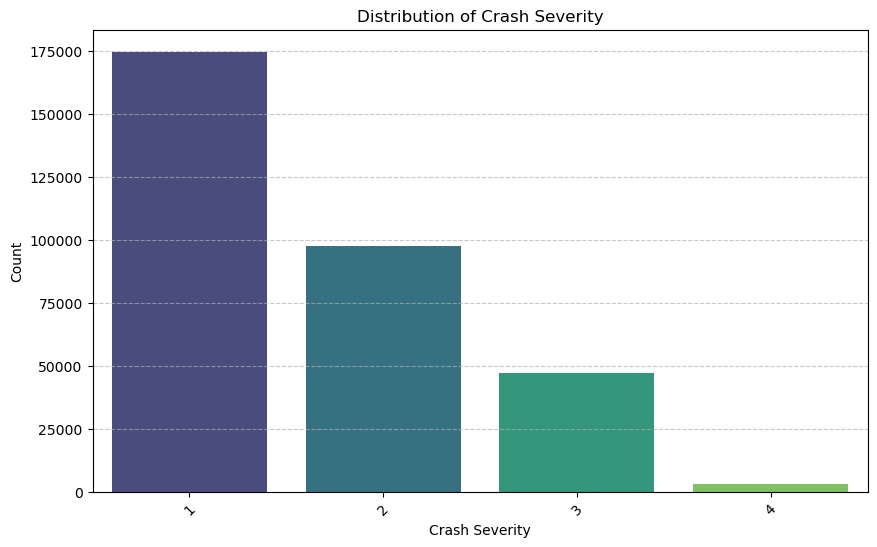

In [18]:
# Plotting the distribution of Crash_Severity using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='csef_severity', palette='viridis')
plt.title('Distribution of Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/p3/r3tlf0sj4rsfpv7j1hvsz4vr0000gn/T/ipykernel_65957/1437791440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='csef_severity', palette='viridis')


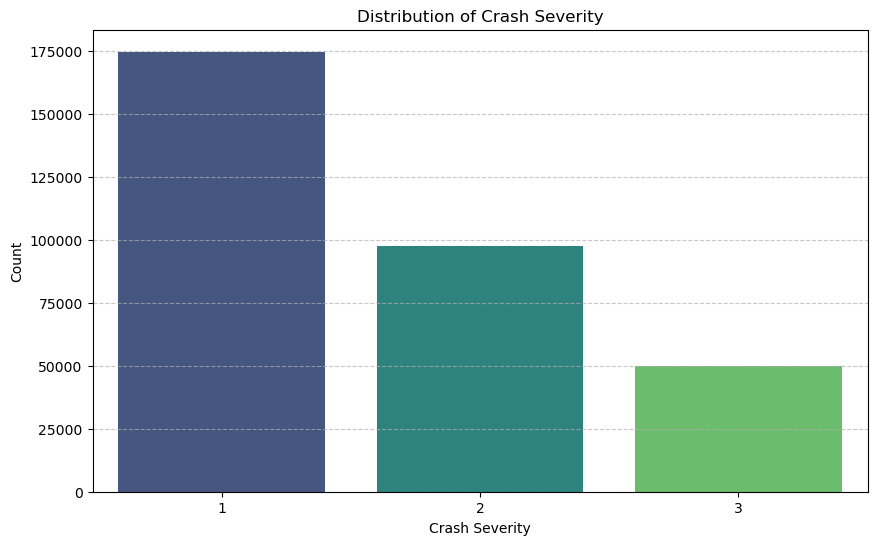

In [19]:


# Combine values 3 and 4 into a single category
df['csef_severity'] = df['csef_severity'].replace({4: 3})

# Plotting the distribution of Crash Severity using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='csef_severity', palette='viridis')
plt.title('Distribution of Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
df.info()

summary_stats = df.describe()
print(summary_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322382 entries, 0 to 322381
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      322382 non-null  int64  
 1   month                     322382 non-null  int64  
 2   day                       322382 non-null  object 
 3   time                      322382 non-null  object 
 4   state                     322382 non-null  object 
 5   stats_area                322382 non-null  object 
 6   lga                       322382 non-null  object 
 7   latitude                  322382 non-null  float64
 8   longitude                 322382 non-null  float64
 9   speed_limit               322382 non-null  int64  
 10  csef_severity             322382 non-null  int64  
 11  location                  322382 non-null  object 
 12  day_type                  322382 non-null  object 
 13  Weekday                   322382 non-null  i

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322382 entries, 0 to 322381
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      322382 non-null  int64  
 1   month                     322382 non-null  int64  
 2   day                       322382 non-null  object 
 3   time                      322382 non-null  object 
 4   state                     322382 non-null  object 
 5   stats_area                322382 non-null  object 
 6   lga                       322382 non-null  object 
 7   latitude                  322382 non-null  float64
 8   longitude                 322382 non-null  float64
 9   speed_limit               322382 non-null  int64  
 10  csef_severity             322382 non-null  int64  
 11  location                  322382 non-null  object 
 12  day_type                  322382 non-null  object 
 13  Weekday                   322382 non-null  i

In [22]:
# Assuming df is your DataFrame
# Rename columns
df.rename(columns={
    'location': 'Location',
    'csef_severity': 'Crash_Severity',
    'Weekday': 'Is_Weekday',
    'Weekend': 'Is_Weekend',
    'Office': 'Is_Office_Hours',
    'Non_Office': 'Is_Non_Office_Hours',
    'loc_type_Intersection': 'Loc_Type_Intersection',
    'loc_type_Midblock': 'Loc_Type_Midblock',
    'light_cond_Day': 'Light_Cond_Day',
    'light_cond_Night': 'Light_Cond_Night',
    'weather_cond_Not Raining': 'Weather_Cond_Not_Raining',
    'weather_cond_Raining': 'Weather_Cond_Raining',
    'less_than_or_equal_60': 'Speed_Less_Or_Equal_60',
    'greater_than_60': 'Speed_Greater_Than_60',
    'latitude': 'Latitude',
    'longitude': 'Longitude'
}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322382 entries, 0 to 322381
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      322382 non-null  int64  
 1   month                     322382 non-null  int64  
 2   day                       322382 non-null  object 
 3   time                      322382 non-null  object 
 4   state                     322382 non-null  object 
 5   stats_area                322382 non-null  object 
 6   lga                       322382 non-null  object 
 7   Latitude                  322382 non-null  float64
 8   Longitude                 322382 non-null  float64
 9   speed_limit               322382 non-null  int64  
 10  Crash_Severity            322382 non-null  int64  
 11  Location                  322382 non-null  object 
 12  day_type                  322382 non-null  object 
 13  Is_Weekday                322382 non-null  i

In [24]:
import re

# Filter out only intersections
df = df[df['Loc_Type_Intersection'] == 1]

# Add a new column by rounding the latitude and longitude to 3 decimal places
df['Lat_Long_Rounded'] = df.apply(lambda row: (round(row['Latitude'], 3), round(row['Longitude'], 3)), axis=1)

# Custom function to find the first Location with '&' or 'and' (case insensitive)
def find_intersection_location(locations):
    for location in locations:
        if '&' in location or 'AND' in location.upper():
            return location
    return locations.iloc[0]  # Fallback to the first location if none match

# Aggregate the data by location
aggregated_data = df.groupby('Lat_Long_Rounded').agg(
    accident_count=('Crash_Severity', 'count'),
    average_severity=('Crash_Severity', 'mean'),
    is_weekday_mean=('Is_Weekday', 'mean'),
    is_weekend_mean=('Is_Weekend', 'mean'),
    is_office_hours_mean=('Is_Office_Hours', 'mean'),
    is_non_office_hours_mean=('Is_Non_Office_Hours', 'mean'),
    light_cond_day_mean=('Light_Cond_Day', 'mean'),
    light_cond_night_mean=('Light_Cond_Night', 'mean'),
    weather_cond_not_raining_mean=('Weather_Cond_Not_Raining', 'mean'),
    weather_cond_raining_mean=('Weather_Cond_Raining', 'mean'),
    speed_less_or_equal_60_mean=('Speed_Less_Or_Equal_60', 'mean'),
    speed_greater_than_60_mean=('Speed_Greater_Than_60', 'mean'),
    lga=('lga', 'first'),  # Use 'first' to get the first occurrence
    state=('state', 'first'),  # Use 'first' to get the first occurrence
    location=('Location', lambda x: find_intersection_location(x))  # Custom function for Location
).reset_index()

# Function to replace ' and ' with ' & ' and convert to lowercase
def replace_and(text):
    return re.sub(r'\band\b', '&', text.lower())

# Apply the function to the 'location' column
aggregated_data['location'] = aggregated_data['location'].apply(replace_and)

# Define a function to identify ' nan' or 'nan ' patterns
def contains_nan_pattern(location):
    if pd.isna(location):
        return True
    return bool(re.search(r'\bnan\b', location))

# Remove rows with 'nan' patterns or 'unknown'
df_cleaned = aggregated_data[~aggregated_data['location'].apply(contains_nan_pattern) & (aggregated_data['location'] != 'unknown')]

# Save the cleaned and aggregated data to a single output file
output_file = "merged_locations.csv"
df_cleaned.to_csv(output_file, index=False)

# Calculate the sum of the accident_count column
total_accidents = df_cleaned['accident_count'].sum()

# Print the total accidents
print("Total Accidents:", total_accidents)
print("Final aggregated data has been saved to:", output_file)


Total Accidents: 156694
Final aggregated data has been saved to: merged_locations.csv
